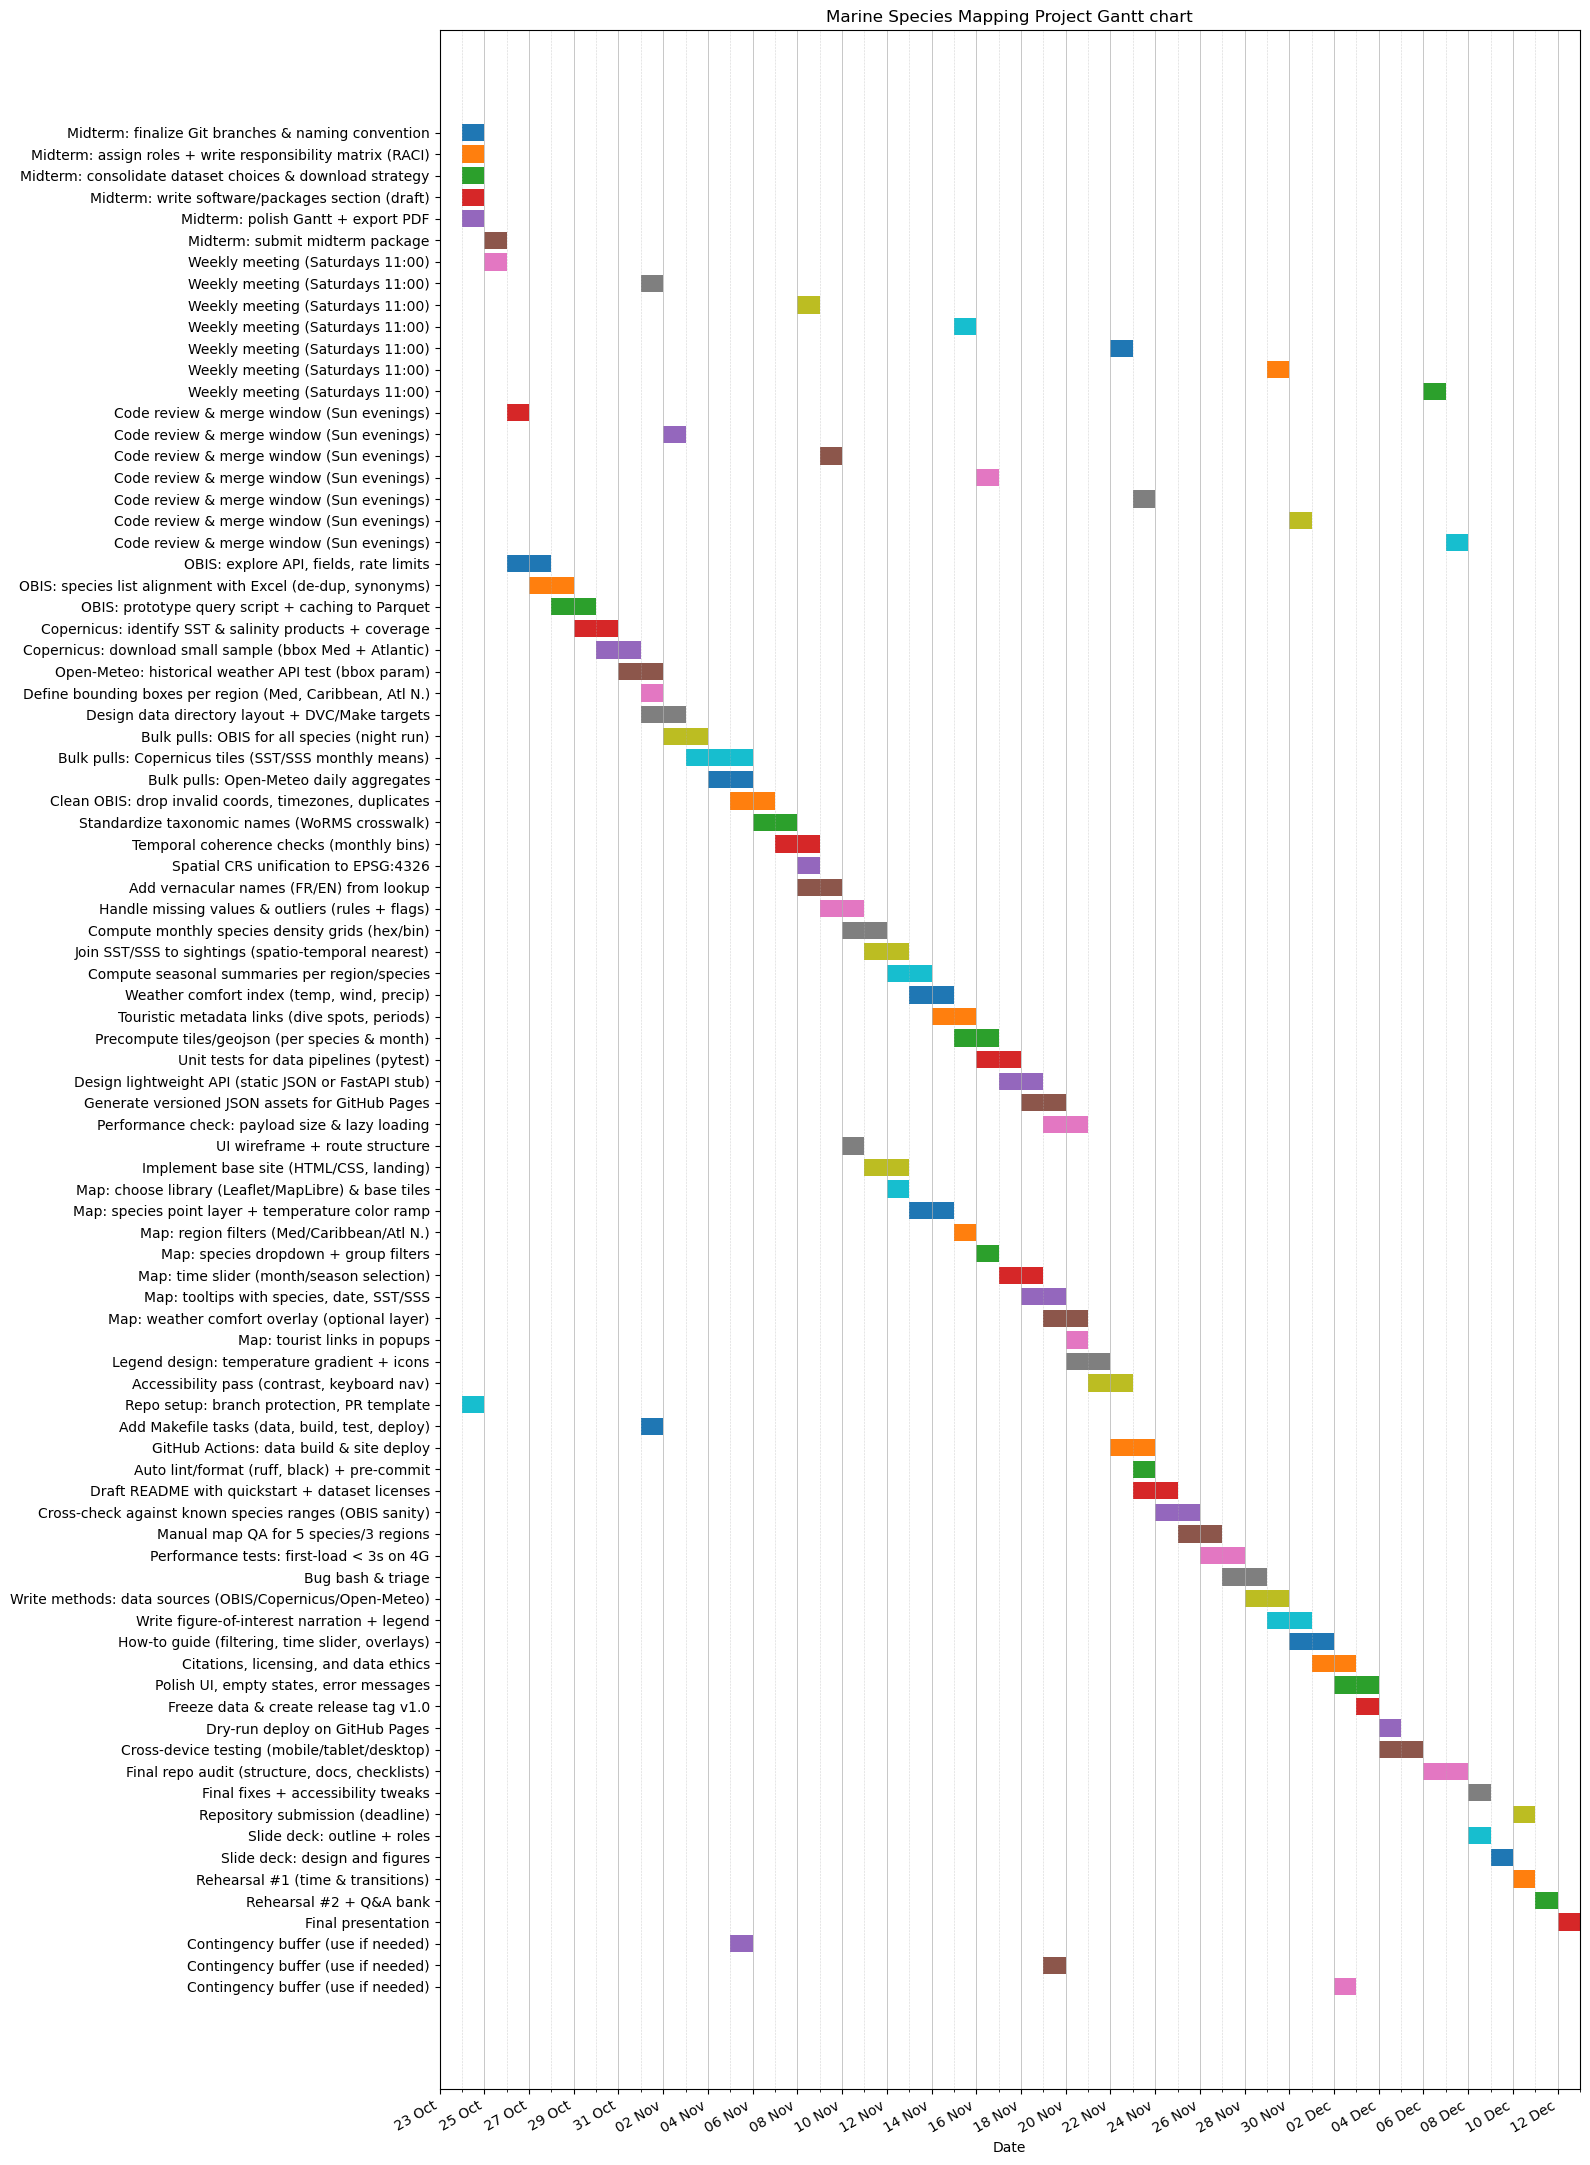

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, DayLocator, DateFormatter
from datetime import datetime, timedelta
import numpy as np

# Important deadlines to watch
project_start = datetime(2025, 10, 24)
midterm_due = datetime(2025, 10, 25)
final_repo_due = datetime(2025, 12, 10)
presentation_date = datetime(2025, 12, 12)
project_end = presentation_date

saturdays = [d(2025,10,25), d(2025,11,1), d(2025,11,8), d(2025,11,15), d(2025,11,22), d(2025,11,29), d(2025,12,6)]
meeting_tasks = [("Weekly meeting (Saturday 11:00)", s, s) for s in saturdays]

tasks = [
    # Midterm tasks
    ("Midterm: finalize Git branches & naming convention", d(2025,10,24), d(2025,10,24)),
    ("Midterm: assign roles + write responsibility matrix (RACI)", d(2025,10,24), d(2025,10,24)),
    ("Midterm: consolidate dataset choices & download strategy", d(2025,10,24), d(2025,10,24)),
    ("Midterm: write software/packages section (draft)", d(2025,10,24), d(2025,10,24)),
    ("Midterm: polish Gantt + export PDF", d(2025,10,24), d(2025,10,24)),
    ("Midterm: submit midterm package", d(2025,10,25), d(2025,10,25)),

    # Code reviews and merge requests (version control)
    ("Code review & merge window (Sunday evening)", d(2025,10,26), d(2025,10,26)),
    ("Code review & merge window (Sunday evening)", d(2025,11,2), d(2025,11,2)),
    ("Code review & merge window (Sunday evening)", d(2025,11,9), d(2025,11,9)),
    ("Code review & merge window (Sunday evening)", d(2025,11,16), d(2025,11,16)),
    ("Code review & merge window (Sunday evening)", d(2025,11,23), d(2025,11,23)),
    ("Code review & merge window (Sunday evening)", d(2025,11,30), d(2025,11,30)),
    ("Code review & merge window (Sunday evening)", d(2025,12,7), d(2025,12,7)),

    # Data importing
    ("OBIS: explore API, fields, rate limits", d(2025,10,26), d(2025,10,27)),
    ("OBIS: species list alignment with Excel (de-dup, synonyms)", d(2025,10,27), d(2025,10,28)),
    ("OBIS: prototype query script + caching to Parquet", d(2025,10,28), d(2025,10,29)),
    ("Copernicus: identify SST & salinity products + coverage", d(2025,10,29), d(2025,10,30)),
    ("Copernicus: download small sample (bbox Med + Atlantic)", d(2025,10,30), d(2025,10,31)),
    ("Open-Meteo: historical weather API test (bbox param)", d(2025,10,31), d(2025,11,1)),
    ("Define bounding boxes per region (Med, North Atlantic)", d(2025,11,1), d(2025,11,1)),
    ("Design data directory layout + DVC/Make targets", d(2025,11,1), d(2025,11,2)),
    ("Bulk pulls: OBIS for all species (night run)", d(2025,11,2), d(2025,11,3)),
    ("Bulk pulls: Copernicus tiles (SST/SSS monthly means)", d(2025,11,3), d(2025,11,5)),
    ("Bulk pulls: Open-Meteo daily aggregates", d(2025,11,4), d(2025,11,5)),

    # Data cleaning 
    ("Clean OBIS: drop invalid coords, timezones, duplicates", d(2025,11,5), d(2025,11,6)),
    ("Standardize taxonomic names", d(2025,11,6), d(2025,11,7)),
    ("Temporal coherence checks (monthly bins)", d(2025,11,7), d(2025,11,8)),
    ("Spatial CRS unification to EPSG:4326", d(2025,11,8), d(2025,11,8)),
    ("Add vernacular names (FR/EN) from lookup", d(2025,11,8), d(2025,11,9)),
    ("Handle missing values & outliers (rules + flags)", d(2025,11,9), d(2025,11,10)),
    ("Compute monthly species density grids (hex/bin)", d(2025,11,10), d(2025,11,11)),

    # Features
    ("Join SST/SSS to sightings (spatio-temporal nearest)", d(2025,11,11), d(2025,11,12)),
    ("Compute seasonal summaries per region/species", d(2025,11,12), d(2025,11,13)),
    ("Weather comfort index (temp, wind, precip)", d(2025,11,13), d(2025,11,14)),
    ("Touristic metadata links (dive spots, periods)", d(2025,11,14), d(2025,11,15)),
    ("Precompute tiles/geojson (per species & month)", d(2025,11,15), d(2025,11,16)),
    ("Unit tests for data pipelines (mypy, black, pytest)", d(2025,11,16), d(2025,11,17)),

    # Backend
    ("Design lightweight API (static JSON or FastAPI stub)", d(2025,11,17), d(2025,11,18)),
    ("Generate versioned JSON assets for GitHub Pages", d(2025,11,18), d(2025,11,19)),
    ("Performance check: payload size & lazy loading", d(2025,11,19), d(2025,11,20)),

    # Frontend (map)
    ("UI wireframe and route structure", d(2025,11,10), d(2025,11,10)),
    ("Implement base site (HTML/CSS, landing)", d(2025,11,11), d(2025,11,12)),
    ("Map: choose library (Leaflet/MapLibre) & base tiles", d(2025,11,12), d(2025,11,12)),
    ("Map: species point layer + temperature color ramp", d(2025,11,13), d(2025,11,14)),
    ("Map: region filters (Med/Caribbean/Atl N.)", d(2025,11,15), d(2025,11,15)),
    ("Map: species dropdown + group filters", d(2025,11,16), d(2025,11,16)),
    ("Map: time slider (month/season selection)", d(2025,11,17), d(2025,11,18)),
    ("Map: tooltips with species, date, SST/SSS", d(2025,11,18), d(2025,11,19)),
    ("Map: weather comfort overlay (optional layer)", d(2025,11,19), d(2025,11,20)),
    ("Map: tourist links in popups", d(2025,11,20), d(2025,11,20)),
    ("Legend design: temperature gradient + icons", d(2025,11,20), d(2025,11,21)),
    ("Accessibility pass (contrast, keyboard nav)", d(2025,11,21), d(2025,11,22)),

    # CI/CD & repo 
    ("Repo setup: branch protection, PR template", d(2025,10,24), d(2025,10,24)),
    ("Add Makefile tasks (data, build, test, deploy)", d(2025,11,1), d(2025,11,1)),
    ("GitHub Actions: data build & site deploy", d(2025,11,22), d(2025,11,23)),
    ("Auto lint (poetry run black .) + pre-commit", d(2025,11,23), d(2025,11,23)),
    ("Draft README with quickstart + dataset licenses", d(2025,11,23), d(2025,11,24)),

    # Quality check
    ("Cross-check against known species ranges (OBIS sanity)", d(2025,11,24), d(2025,11,25)),
    ("Manual map Quality check for 5 species/3 regions", d(2025,11,25), d(2025,11,26)),
    ("Performance tests: first-load < 3s on 4G", d(2025,11,26), d(2025,11,27)),
    ("Bug bash & triage", d(2025,11,27), d(2025,11,28)),

    # Documents 
    ("Write methods: data sources (OBIS/Copernicus/Open-Meteo)", d(2025,11,28), d(2025,11,29)),
    ("Write figure-of-interest narration + legend", d(2025,11,29), d(2025,11,30)),
    ("How-to guide (filtering, time slider, overlays)", d(2025,11,30), d(2025,12,1)),
    ("Citations, licensing, and data ethics", d(2025,12,1), d(2025,12,2)),

    # Finalisation of project and site
    ("Polish UI, empty states, error messages", d(2025,12,2), d(2025,12,3)),
    ("Freeze data & create release tag v1.0", d(2025,12,3), d(2025,12,3)),
    ("Dry-run deploy on GitHub Pages", d(2025,12,4), d(2025,12,4)),
    ("Cross-device testing (mobile/tablet/desktop)", d(2025,12,4), d(2025,12,5)),
    ("Final repo audit (structure, docs, checklists)", d(2025,12,6), d(2025,12,7)),
    ("Final fixes + accessibility tweaks", d(2025,12,8), d(2025,12,8)),
    ("Repository submission (deadline)", final_repo_due, final_repo_due),

    # Presentation
    ("Slide deck: outline + roles", d(2025,12,8), d(2025,12,8)),
    ("Slide deck: design and figures", d(2025,12,9), d(2025,12,9)),
    ("Rehearsal #1 (time & transitions)", d(2025,12,10), d(2025,12,10)),
    ("Rehearsal #2 + Q&A bank", d(2025,12,11), d(2025,12,11)),
    ("Final presentation", presentation_date, presentation_date),

    # Buffers in case of unexpected event
    ("Contingency buffer (use if needed)", d(2025,11,5), d(2025,11,5)),
    ("Contingency buffer (use if needed)", d(2025,11,19), d(2025,11,19)),
    ("Contingency buffer (use if needed)", d(2025,12,2), d(2025,12,2)),
]


fig, ax = plt.subplots(figsize=(16, max(8, len(df) * 0.25)))

y_pos = np.arange(len(df))
for i, (_, r) in enumerate(df.iterrows()):
    left = date2num(r["Start"])
    width = (r["End"] - r["Start"]).days + 1
    ax.barh(i, width, left=left, align="center")

ax.set_yticks(y_pos)
ax.set_yticklabels(df["Task"])

ax.xaxis.set_major_locator(DayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%d %b"))
ax.xaxis.set_minor_locator(DayLocator(interval=1))
fig.autofmt_xdate()

ax.grid(axis="x", which="major", linestyle="-", linewidth=0.5)
ax.grid(axis="x", which="minor", linestyle=":", linewidth=0.4)

ax.set_xlim(date2num(project_start - timedelta(days=1)),
            date2num(project_end + timedelta(days=1)))

ax.invert_yaxis()
ax.set_xlabel("Date")
ax.set_title("Marine Species Mapping Project Gantt chart")

plt.tight_layout()
plt.savefig("gantt_marine_species_project_dates.png", dpi=200, bbox_inches="tight")
plt.show()

